# Principles of Geocomputing: Lab 6 (4 points)

This lab takes a final step forward. Now that you have built upon your knowledge and skills in Python programming and learned some geospatial packages, this final lab is designed to ensure you have a solid foundation of geospatial computing skills and knowledge so that you can tackle your final project and solve a geospatial problem of your choice.

In [20]:
pip install --upgrade fiona

Note: you may need to restart the kernel to use updated packages.


In [21]:
your_name = "Ankila Kumari"
your_intid = "Kuma0389"
hours_spent = 4

who_helped_you = "Google-  I was not able to get both states and to download shape file and TA- 3a task. Task 3d- I don't know whether its a error or warning"
who_you_helped = ""
genAI_helped_me = "40% used ChatGPT because I was not able to solve my error."

## 2. Basic Warm-up
This short section will give you a basic warm up in refactoring code, which is the process of rewriting and improving existing code.

### 2a. Python Basics Review
First, run the code cell to create coordinates.txt. Then write Python code in the following cell that meets the following specifications:
 * Open the provided text file (coordinates.txt) which contains coordinates (one pair per line, separated by commas).
 * Read and store the coordinates in a Python list.
 * Add the coordinates list to another Python list (list of lists) named city_coordinates.
 * Use a loop and conditional statements to print only the coordinates located in the northern hemisphere (latitude greater than 0).

In [22]:
# Run this code first.
# List of 25 major global cities with latitude and longitude
cities_coords = [
    (40.7128, -74.0060),   # New York, USA
    (51.5074, -0.1278),    # London, UK
    (35.6895, 139.6917),   # Tokyo, Japan
    (48.8566, 2.3522),     # Paris, France
    (55.7558, 37.6173),    # Moscow, Russia
    (39.9042, 116.4074),   # Beijing, China
    (28.6139, 77.2090),    # New Delhi, India
    (19.0760, 72.8777),    # Mumbai, India
    (52.5200, 13.4050),    # Berlin, Germany
    (41.9028, 12.4964),    # Rome, Italy
    (37.7749, -122.4194),  # San Francisco, USA
    (31.2304, 121.4737),   # Shanghai, China
    (34.0522, -118.2437),  # Los Angeles, USA
    (-33.8688, 151.2093),  # Sydney, Australia
    (-34.6037, -58.3816),  # Buenos Aires, Argentina
    (-23.5505, -46.6333),  # São Paulo, Brazil
    (-33.9249, 18.4241),   # Cape Town, South Africa
    (-22.9068, -43.1729),  # Rio de Janeiro, Brazil
    (-37.8136, 144.9631),  # Melbourne, Australia
    (-12.0464, -77.0428),  # Lima, Peru
    (-1.2921, 36.8219),    # Nairobi, Kenya
    (-41.2865, 174.7762),  # Wellington, New Zealand
    (-26.2041, 28.0473),   # Johannesburg, South Africa
    (-17.8249, 31.0492),   # Harare, Zimbabwe
    (-6.2088, 106.8456)    # Jakarta, Indonesia
]

# Write coordinates to text file
with open('coordinates.txt', 'w') as file:
    for lat, lon in cities_coords:
        file.write(f"{lat},{lon}\n")

print("coordinates.txt file has been created successfully.")

coordinates.txt file has been created successfully.


In [23]:
# WRITE YOUR CODE HERE that ...
city_coordinates = []
with open('coordinates.txt', 'r') as file:
    for line in file:
        lat, lon = line.strip().split(',')
        city_coordinates.append([float(lat), float(lon)])

print("Northern Hemisphere coordinates:")
for coord in city_coordinates:
    if coord[0] > 0:
        print(coord)


Northern Hemisphere coordinates:
[40.7128, -74.006]
[51.5074, -0.1278]
[35.6895, 139.6917]
[48.8566, 2.3522]
[55.7558, 37.6173]
[39.9042, 116.4074]
[28.6139, 77.209]
[19.076, 72.8777]
[52.52, 13.405]
[41.9028, 12.4964]
[37.7749, -122.4194]
[31.2304, 121.4737]
[34.0522, -118.2437]


### 2b. Conditional Looping
Now write a piece of code that does the following:
 * Loop through your stored coordinates list (city_coordinates).
 * Use conditionals to identify coordinates that fall within a bounding box defined by latitude [10, 50] and longitude [-130, -60].
 * Save these filtered coordinates to a new text file called filtered_coords.txt.
 * Also, print these filtered coordinates

In [24]:
lat_min, lat_max = 10, 50
lon_min, lon_max = -130, -60

filtered_coords = []
for coord in city_coordinates:
    lat, lon = coord
    if lat_min <= lat <= lat_max and lon_min <= lon <= lon_max:
        filtered_coords.append(coord)

# Save to file
with open('filtered_coords.txt', 'w') as f:
    for coord in filtered_coords:
        f.write(f"{coord[0]},{coord[1]}\n")

print("Filtered coordinates:", filtered_coords)

Filtered coordinates: [[40.7128, -74.006], [37.7749, -122.4194], [34.0522, -118.2437]]


### 2c. Northern most and Southern most cities
Now write a piece of code that does the following:
 * Write a function named *ns_cities* that accepts a list as a parameter.
 * Inside this function do the following:
   * Loop through the list that contains coordinates of cities.
   * Use conditionals identify the northern most city and the southern most city.
   * Return the coordinate pairs of the northern most city and southern most city.
 * Call your function with the list of stored coordinates (city_coordinates)
 * Accept the returned values and use them for the next 2 print statements.
 * Print "The northern most city coordinates are: [COORDINATES]"
 * Print "The southern most city coordinates are: [COORDINATES]"
 

In [25]:
# Define the function to find the northernmost and southernmost cities
def ns_cities(city_list):
    # Check if the city_list is empty
    if not city_list:
        return None, None  # Return None for both if the list is empty
    
    # Initialize variables to store the northernmost and southernmost cities
    northernmost = city_list[0]
    southernmost = city_list[0]

    # Loop through the list of cities
    for coord in city_list:
        lat, lon = coord
        # Compare latitude to find the northernmost city
        if lat > northernmost[0]:
            northernmost = coord
        # Compare latitude to find the southernmost city
        if lat < southernmost[0]:
            southernmost = coord

    return northernmost, southernmost

# Make sure city_coordinates is populated before calling the function
# List of 25 major global cities with latitude and longitude
city_coordinates = [
    (40.7128, -74.0060),   # New York, USA
    (51.5074, -0.1278),    # London, UK
    (35.6895, 139.6917),   # Tokyo, Japan
    (48.8566, 2.3522),     # Paris, France
    (55.7558, 37.6173),    # Moscow, Russia
    (39.9042, 116.4074),   # Beijing, China
    (28.6139, 77.2090),    # New Delhi, India
    (19.0760, 72.8777),    # Mumbai, India
    (52.5200, 13.4050),    # Berlin, Germany
    (41.9028, 12.4964),    # Rome, Italy
    (37.7749, -122.4194),  # San Francisco, USA
    (31.2304, 121.4737),   # Shanghai, China
    (34.0522, -118.2437),  # Los Angeles, USA
    (-33.8688, 151.2093),  # Sydney, Australia
    (-34.6037, -58.3816),  # Buenos Aires, Argentina
    (-23.5505, -46.6333),  # São Paulo, Brazil
    (-33.9249, 18.4241),   # Cape Town, South Africa
    (-22.9068, -43.1729),  # Rio de Janeiro, Brazil
    (-37.8136, 144.9631),  # Melbourne, Australia
    (-12.0464, -77.0428),  # Lima, Peru
    (-1.2921, 36.8219),    # Nairobi, Kenya
    (-41.2865, 174.7762),  # Wellington, New Zealand
    (-26.2041, 28.0473),   # Johannesburg, South Africa
    (-17.8249, 31.0492),   # Harare, Zimbabwe
    (-6.2088, 106.8456)    # Jakarta, Indonesia
]

# Call the function with city_coordinates list
northernmost_city, southernmost_city = ns_cities(city_coordinates)

# Check if the function returned None for both, indicating an empty list
if northernmost_city is None or southernmost_city is None:
    print("The list of cities is empty.")
else:
    # Print the results
    print(f"The northern most city coordinates are: {northernmost_city}")
    print(f"The southern most city coordinates are: {southernmost_city}")


The northern most city coordinates are: (55.7558, 37.6173)
The southern most city coordinates are: (-41.2865, 174.7762)


## 3. Solving Problems

In this section, you will focus on GeoPandas and Shapely in building your programming skills.

You will use GeoPandas and Shapely to work with Minnesota census data. Use the provided shapefile we have used throughout class: **cb_2015_27_tract_500k.zip**.

### 3a. Load and look
 * Load the shapefile into a GeoDataFrame.
 * Print the number of tracts in the dataset.
 * Plot the tracts.

Number of tracts: 1336


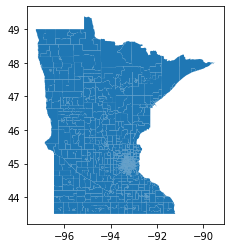

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt


gdf = gpd.read_file("data/cb_2015_27_tract_500k.zip") 
print("Number of tracts:", len(gdf))
gdf.plot()
plt.show()

### 3b. Coordinate Reference System (CRS)

What is the current CRS of the dataset? Why might reprojecting be necessary for area or distance calculations? Look back at your readings or look online to learn more about CRS.

One CRS is called UTM. What is interesting is ... "Most of Minnesota is contained in UTM Zone 15, with the western-most parts of the state being in Zone 14. In many cases this difference is ignored, and the entire state is treated as if it were in an "extended" zone 15. Maps using the UTM projection, if showing a large enough area East to West, will have noticeable distortion." 

Quoted source and information: https://www.mngeo.state.mn.us/committee/cadastral/iisac/plan2.html

So, if the dataset is not in UTM15, then reproject the dataset using geopandas.
(Hint: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_crs.html)

In [27]:
# Check the current CRS
print(f"Current CRS: {gdf.crs}")

# Reproject to UTM Zone 15 if necessary
gdf_utm = gdf.to_crs(epsg=26915)
print(f"Reprojected CRS: {gdf_utm.crs}")


Current CRS: EPSG:4269
Reprojected CRS: EPSG:26915


### 3c. Centroids!
We are going to calculate centroids for each feature and map them.
 * Compute centroids for each tract and add them as a new column.
 * Visualize both the tracts and their centroids on the same map.

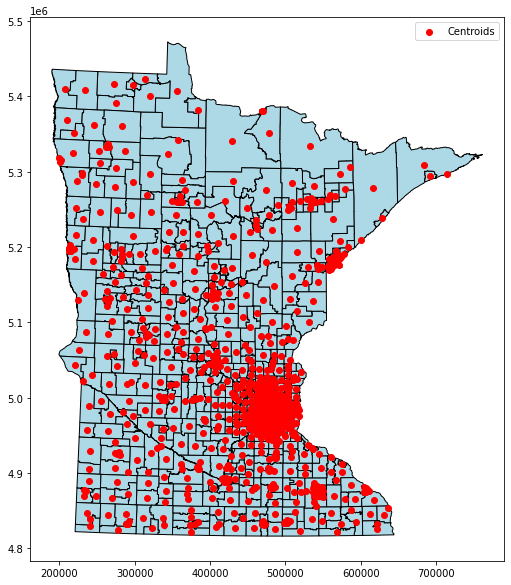

In [28]:
# Compute centroids for each tract and add them as a new column
gdf_utm['centroid'] = gdf_utm.geometry.centroid

# Plot the tracts and their centroids
ax = gdf_utm.plot(figsize=(10, 10), color='lightblue', edgecolor='black')
gdf_utm['centroid'].plot(ax=ax, color='red', marker='o', label='Centroids')

plt.legend()
plt.show()


### 3d. Using Within and Intersects
Things are getting tricky ...
 * Select all features inside Hennepin county
 * Create a convex hull around all the tracts in Hennepin county.
 * Identify and plot all tracts in Minnesota that intersect with this convex hull **but are not within Hennepin County**.

/tmp/ipykernel_2786/2586035568.py:7: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  hennepin_tracts = gdf_utm[gdf_utm.geometry.within(hennepin_gdf.unary_union)]
/tmp/ipykernel_2786/2586035568.py:10: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  convex_hull = hennepin_tracts.geometry.unary_union.convex_hull
/tmp/ipykernel_2786/2586035568.py:13: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  intersecting_tracts = gdf_utm[gdf_utm.geometry.intersects(convex_hull) & ~gdf_utm.geometry.within(hennepin_gdf.unary_union)]
/tmp/ipykernel_2786/2586035568.py:22: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  hennepin_tracts.plot(ax=ax, color='green', edgecolor='black', label='Inside Hennepin')
/tmp/ipykernel_2786/2586035568.py:25: UserWarning: The GeoDataFrame you are attempting to p

AttributeError: 'GeometryCollection' object has no attribute 'exterior'

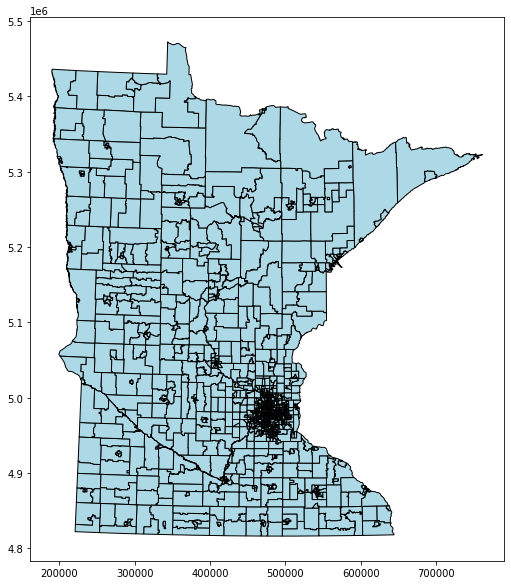

In [29]:
from shapely.geometry import MultiPolygon

# Load Hennepin County shapefile (you would need to have this shapefile)
hennepin_gdf = gpd.read_file("data/cb_2018_us_state_500k.zip")

# Filter tracts inside Hennepin County
hennepin_tracts = gdf_utm[gdf_utm.geometry.within(hennepin_gdf.unary_union)]

# Create convex hull around all tracts in Hennepin County
convex_hull = hennepin_tracts.geometry.unary_union.convex_hull

# Select tracts that intersect with the convex hull but are not within Hennepin County
intersecting_tracts = gdf_utm[gdf_utm.geometry.intersects(convex_hull) & ~gdf_utm.geometry.within(hennepin_gdf.unary_union)]

# Plot the tracts in Hennepin County and those that intersect with the convex hull
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all tracts
gdf_utm.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot tracts in Hennepin County
hennepin_tracts.plot(ax=ax, color='green', edgecolor='black', label='Inside Hennepin')

# Plot intersecting tracts
intersecting_tracts.plot(ax=ax, color='orange', edgecolor='black', label='Intersecting Hull')

# Plot the convex hull
ax.plot(*convex_hull.exterior.xy, color='red', label='Convex Hull')

plt.legend()
plt.show()


## 4. Reps (Repetitive actions to build your comfort levels)
This series of exercises is designed to build your comfort writing Python code. These reps are focused on NumPy.


### 4.a. 
Create a NumPy array with values ranging from 0 to 99. Reshape it into a 10x10 array. Save the array as *my_array*

In [30]:
import numpy as np
my_array = np.arange(100).reshape(10, 10)

### 4.b. 
Select and print the sub-array containing rows 2 to 4 and columns 5 to 7 from *my_array*

In [31]:
print(my_array[2:5, 5:8])  # Rows 2-4, Columns 5-7

[[25 26 27]
 [35 36 37]
 [45 46 47]]


### 4.c. 

Calculate and print the mean, median, and standard deviation of the entire array using numpy functions.

In [32]:
print("Mean:", np.mean(my_array))
print("Median:", np.median(my_array))
print("Std Dev:", np.std(my_array))

Mean: 49.5
Median: 49.5
Std Dev: 28.86607004772212


### 4.d. 
Create two random NumPy arrays of size 5x5 and perform element-wise multiplication.

In [33]:
import numpy as np

# Create two random 5x5 arrays
a = np.random.rand(5, 5)
b = np.random.rand(5, 5)

# Perform element-wise multiplication
result = a * b

# Print the arrays and result
print("Array a:\n", a)
print("\nArray b:\n", b)
print("\nElement-wise multiplication result:\n", result)


Array a:
 [[0.85117717 0.1518739  0.56838987 0.45009412 0.00830933]
 [0.90519987 0.13761442 0.89394968 0.49507332 0.71842685]
 [0.89973661 0.63612636 0.57517327 0.48596722 0.22718813]
 [0.76610719 0.14299833 0.0832126  0.4979401  0.95958614]
 [0.52516207 0.02871068 0.07386836 0.31698791 0.80508064]]

Array b:
 [[0.90489149 0.09979777 0.29796151 0.17687581 0.92095836]
 [0.90181858 0.59072161 0.79431408 0.48056644 0.65210145]
 [0.33143276 0.82721936 0.81578078 0.15095841 0.38373635]
 [0.04232719 0.77654856 0.08927276 0.25300335 0.25838359]
 [0.23719421 0.48419636 0.3013271  0.10760623 0.196175  ]]

Element-wise multiplication result:
 [[0.77022298 0.01515668 0.16935831 0.07961076 0.00765254]
 [0.81632607 0.08129181 0.71007682 0.23791562 0.46848719]
 [0.29820219 0.52621604 0.4692153  0.07336084 0.08718034]
 [0.03242716 0.11104515 0.00742862 0.12598051 0.24794131]
 [0.1245654  0.01390161 0.02225854 0.03410987 0.15793669]]


## 5. Optional stretch exercises (Not graded)

**GeoPandas**: Using the states.shp shapefile, determine which state shares borders with the most other states. Describe your approach clearly and print the result.

**Shapely**: Create a Python function using Shapely that takes a polygon and a list of coordinate points as input, returning which points fall within the polygon. Test your function using a polygon of your choice and a set of randomly generated points. Provide visual output using matplotlib.

**Scikit-learn**: Using the list of coordinates below (latitude and longitude) scattered around a metropolitan city. Use scikit-learn to:
 * Cluster these locations into 3 meaningful groups using K-Means clustering.
 * Find the nearest neighbor for a new location (latitude=40.730610, longitude=-73.935242) using Nearest Neighbors.
 


In [34]:
import numpy as np

locations = np.array([
    [40.748817, -73.985428],  # Empire State Building
    [40.712776, -74.005974],  # Wall Street
    [40.758896, -73.985130],  # Times Square
    [40.706192, -74.009160],  # World Trade Center
    [40.730824, -73.997330],  # Washington Square Park
    [40.761581, -73.977663],  # Central Park South
    [40.729517, -73.998649],  # NYU
    [40.750504, -73.993439],  # Madison Square Garden
    [40.689247, -74.044502],  # Statue of Liberty
    [40.752726, -73.977229],  # Grand Central Terminal
    [40.807536, -73.962573],  # Columbia University
    [40.706086, -73.996864],  # Brooklyn Bridge
    [40.785091, -73.968285],  # Central Park
    [40.758740, -73.978674],  # Rockefeller Center
    [40.748441, -73.985664],  # Macy's Herald Square
    [40.754932, -73.984016],  # Bryant Park
    [40.782864, -73.965355],  # The Met
    [40.730610, -73.935242],  # East Village
    [40.730974, -73.997701],  # West Village
    [40.761432, -73.977621],  # Carnegie Hall
])

In [35]:
import geopandas as gpd

gdf = gpd.read_file("data/tl_2024_us_state.zip")

# Initialize a dictionary to store the count of neighboring states
neighbors_count = {}

# Loop through each state and calculate how many other states it shares a border with
for index, row in gdf.iterrows():
    state = row['NAME']  # Get the state name
    # Find neighbors by checking if the geometries intersect (excluding itself)
    neighbors = gdf[gdf.geometry.intersects(row['geometry']) & (gdf.index != index)]
    neighbors_count[state] = len(neighbors)

# Define the states you are interested in
states_of_interest = ['Tennessee', 'Missouri']

# Print the number of borders for Tennessee and Missouri
for state in states_of_interest:
    if state in neighbors_count:
        print(f"The state {state} shares borders with {neighbors_count[state]} other states.")
    else:
        print(f"{state} not found in the dataset.")


The state Tennessee shares borders with 8 other states.
The state Missouri shares borders with 8 other states.


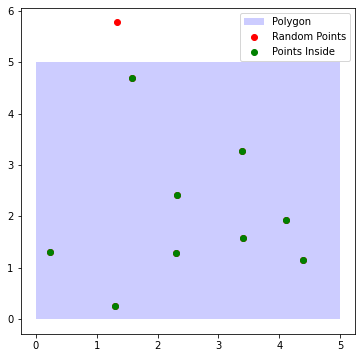

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

# Function to check if points are inside the polygon
def points_within_polygon(polygon, points):
    inside_points = []
    for point in points:
        p = Point(point)
        if polygon.contains(p):
            inside_points.append(point)
    return inside_points

# Define a polygon (example: square polygon)
polygon_coords = [(0, 0), (5, 0), (5, 5), (0, 5)]
polygon = Polygon(polygon_coords)

# Generate random points
random_points = np.random.rand(10, 2) * 6  # 10 random points within the bounds of a 6x6 area

# Find points inside the polygon
inside_points = points_within_polygon(polygon, random_points)

# Plot the polygon and points
fig, ax = plt.subplots(figsize=(6, 6))
x, y = polygon.exterior.xy
ax.fill(x, y, alpha=0.2, fc='blue', label="Polygon")
ax.scatter(random_points[:, 0], random_points[:, 1], color='red', label="Random Points")
ax.scatter([p[0] for p in inside_points], [p[1] for p in inside_points], color='green', label="Points Inside")

plt.legend()
plt.show()


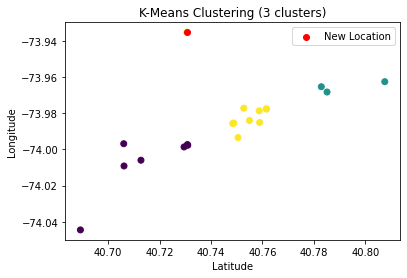

The nearest location to [ 40.73061  -73.935242] is at [ 40.73061  -73.935242] with a distance of 0.0 units.


In [37]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Locations (latitude, longitude)
locations = np.array([
    [40.748817, -73.985428],  # Empire State Building
    [40.712776, -74.005974],  # Wall Street
    [40.758896, -73.985130],  # Times Square
    [40.706192, -74.009160],  # World Trade Center
    [40.730824, -73.997330],  # Washington Square Park
    [40.761581, -73.977663],  # Central Park South
    [40.729517, -73.998649],  # NYU
    [40.750504, -73.993439],  # Madison Square Garden
    [40.689247, -74.044502],  # Statue of Liberty
    [40.752726, -73.977229],  # Grand Central Terminal
    [40.807536, -73.962573],  # Columbia University
    [40.706086, -73.996864],  # Brooklyn Bridge
    [40.785091, -73.968285],  # Central Park
    [40.758740, -73.978674],  # Rockefeller Center
    [40.748441, -73.985664],  # Macy's Herald Square
    [40.754932, -73.984016],  # Bryant Park
    [40.782864, -73.965355],  # The Met
    [40.730610, -73.935242],  # East Village
    [40.730974, -73.997701],  # West Village
    [40.761432, -73.977621],  # Carnegie Hall
])

# 1. K-Means Clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(locations)

# 2. Nearest Neighbor Search
new_location = np.array([[40.730610, -73.935242]])  # New location (East Village)
nbrs = NearestNeighbors(n_neighbors=1, algorithm='auto').fit(locations)
distances, indices = nbrs.kneighbors(new_location)

# Plot K-Means clustering results
plt.scatter(locations[:, 0], locations[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(new_location[0][0], new_location[0][1], color='red', label="New Location")
plt.title('K-Means Clustering (3 clusters)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

# Nearest Neighbor Output
nearest_location = locations[indices[0][0]]
print(f"The nearest location to {new_location[0]} is at {nearest_location} with a distance of {distances[0][0]} units.")
